Ever since I studied abroad in college, I've always dreamed of moving abroad. A couple of my favorite places I've visited over the years would be Czech Republic, Poland, Hungary, Slovakia

For this project I will compare the cost of living where I currently live in Lexington KY to a comparable sized city in each of those countries. is there a country I could move to in Europe that I could live on the same salary I make in the states. where would my money go further, where would my money goes less. 

The most important measures to me: are rent prices for a 1 bedroom apartment, transportation costs, healthcare, grocery prices. 

I mainly just need to know the amount of money I'd need to make to live comfortable, not lavish or extratrodinare. 

I am college educated, but don't carry a professional degree like someone who can practice law, engineer, nurse, doctor. 


I will compare the currency and find out which country would be the most logical answer to my question. I will do it by City, then by country and then by index

I think a heat map would be best for this, to visualize affordability to non. I am considering a bar chart as well. maybe for the Quality of Life one. 

Housing Costs – Rent, mortgage, utilities
Food & Groceries – Cost of basic staples (bread, milk, meat, fruits, etc.)
Transportation – Public transport, fuel, car ownership costs
Healthcare – Insurance, hospital visits, medications
Education – Tuition fees, school expenses
Entertainment & Leisure – Dining out, movies, gyms
Taxes & Insurance – Income tax, social security, local taxes

Major cities vs. suburban areas
Countries with high vs. low living costs
Specific currencies and exchange rates


cities (city_id, city_name, country_id, currency_code)
countries (country_id, country_name, currency_code)
cost_of_living (city_id, housing, food, transport, healthcare, entertainment, total_cost)
currency_exchange (currency_code, exchange_rate_to_usd, last_updated)



In [15]:
import pandas , numpy, matplotlib, seaborn, sqlite3

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [16]:
# Loaded variable 'df' from URI: c:\Users\kpeac\OneDrive\Documents\Projects\Moving-Abroad\currency_exchange_rates.csv
import pandas as pd
df = pd.read_csv('c:\\Users\\kpeac\\OneDrive\\Documents\\Projects\\Moving-Abroad\\currency_exchange_rates.csv')

In [17]:
# Loaded variable 'df' from URI: c:\Users\kpeac\OneDrive\Documents\Projects\Moving-Abroad\Project Data.xlsx
import pandas as pd
df = pd.read_excel(r'c:\Users\kpeac\OneDrive\Documents\Projects\Moving-Abroad\Project Data.xlsx')

In [18]:
print(df.head())

# Load 'Monthly Cost of Living' sheet
df_monthly_cost = pd.read_excel(r'c:\Users\kpeac\OneDrive\Documents\Projects\Moving-Abroad\Project Data.xlsx', sheet_name='Monthly Cost of Living')
print(df_monthly_cost.head())

# Load 'Indexes' sheet
df_indexes = pd.read_excel(r'c:\Users\kpeac\OneDrive\Documents\Projects\Moving-Abroad\Project Data.xlsx', sheet_name='Indexes')
print(df_indexes.head())

# Load currency exchange rates
df_currency_exchange = pd.read_csv('c:\\Users\\kpeac\\OneDrive\\Documents\\Projects\\Moving-Abroad\\currency_exchange_rates.csv')
print(df_currency_exchange.head())


                               Main Cost Parameters  Cities to be compared  \
0                                                NaN     Lexington Ky, USA   
1  Restaurants (includes take out and some sit do...                   609   
2                                   Nightlife Drinks                 58.87   
3  Monthly Grocery Costs (includes pantry staples...                249.34   
4  Drinks at Home (including take away coffee , s...                 28.62   

                Unnamed: 2            Unnamed: 3      Unnamed: 4  \
0  Olomouc, Czech Republic  Brno, Czech Republic  Krakow, Poland   
1                  6268.26             7,693.68        1,667.53    
2                   678.99                860.21          138.75   
3                3,566.63                3640.53         536.69    
4                   234.74               242.50           42.73    

        Unnamed: 5         Unnamed: 6            Unnamed: 7  
0  Wroclaw, Poland  Budapest, Hungary  Bratislava, Slovakia 


Adjusted Cost of Living in USD:
         City  Monthly Cost Currency  Exchange Rate  \
0     Olomouc          1200      CZK     101.259774   
1        Brno          1300      CZK     101.259774   
2    Budapest        150000      HUF     100.078927   
3  Bratislava          1100      EUR     131.521739   
4     Wroclaw          4000      PLN     107.552083   
5      Krakow          3800      PLN     107.552083   
6   Lexington          2800      USD     129.000000   

   Adjusted Cost of Living (USD)  
0                      11.850708  
1                      12.838267  
2                    1498.817035  
3                       8.363636  
4                      37.191283  
5                      35.331719  
6                      21.705426  


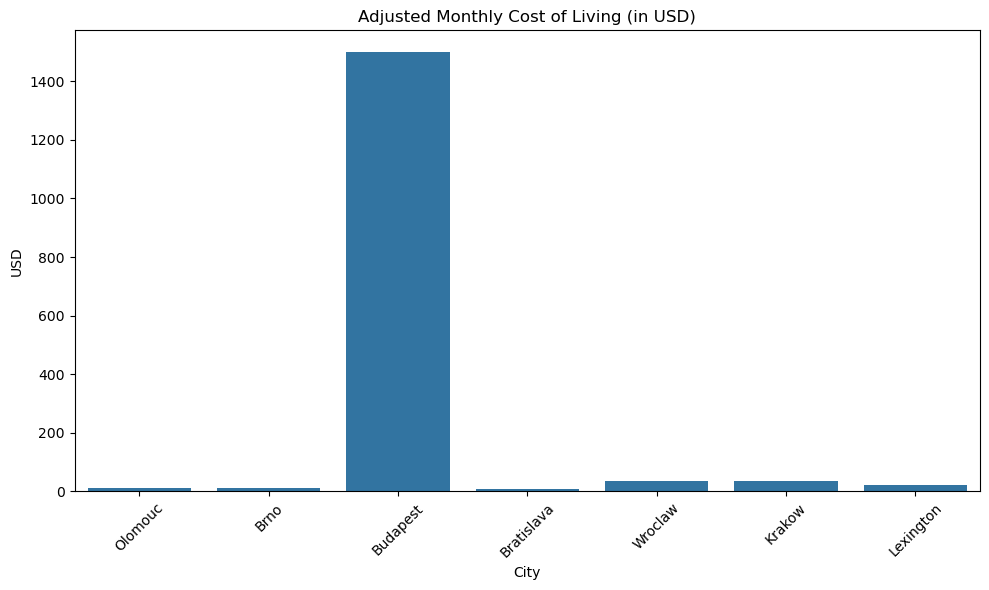

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the exchange rates CSV
file_path = 'currency_exchange_rates.csv'  # Make sure this is in the same folder
exchange_rates_df = pd.read_csv(file_path)

# Step 2: Get the most recent (latest) row of exchange rates
latest_rates = exchange_rates_df.iloc[-1]  # Last row in the DataFrame

# Step 3: Map each city to the currency used
city_currency = {
    'Olomouc': 'CZK',
    'Brno': 'CZK',
    'Budapest': 'HUF',
    'Bratislava': 'EUR',
    'Wroclaw': 'PLN',
    'Krakow': 'PLN',
    'Lexington': 'USD'
}

# Step 4: Create a sample monthly cost of living in local currencies
monthly_cost_data = {
    'City': ['Olomouc', 'Brno', 'Budapest', 'Bratislava', 'Wroclaw', 'Krakow', 'Lexington'],
    'Monthly Cost': [1200, 1300, 150000, 1100, 4000, 3800, 2800],  # Example values
    'Currency': [city_currency[city] for city in city_currency]
}
df_monthly_cost = pd.DataFrame(monthly_cost_data)

# Step 5: Get exchange rates from the latest row (skip the 'date' column)
exchange_rate_dict = latest_rates[1:].to_dict()  # Remove the 'date'
exchange_rate_df = pd.DataFrame(list(exchange_rate_dict.items()), columns=['Currency', 'Exchange Rate'])

# Step 6: Merge exchange rates into the monthly cost table
merged_df = pd.merge(df_monthly_cost, exchange_rate_df, on='Currency', how='left')

# Step 7: Calculate adjusted cost in USD
merged_df['Adjusted Cost of Living (USD)'] = merged_df['Monthly Cost'] / merged_df['Exchange Rate']

# Step 8: Print the result
print("\nAdjusted Cost of Living in USD:")
print(merged_df[['City', 'Monthly Cost', 'Currency', 'Exchange Rate', 'Adjusted Cost of Living (USD)']])

# Step 9: Optional - Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='City', y='Adjusted Cost of Living (USD)')
plt.title('Adjusted Monthly Cost of Living (in USD)')
plt.xlabel('City')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
